In [6]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-6-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [10]:
sales=pd.read_csv("Medicine.csv")

In [11]:
sales=sales.iloc[0:36,]

In [12]:
sales.Month[sales.Month=="Jan"]=1
sales.Month[sales.Month=="Feb"]=2
sales.Month[sales.Month=="Mar"]=3
sales.Month[sales.Month=="Apr"]=4
sales.Month[sales.Month=="May"]=5
sales.Month[sales.Month=="Jun"]=6
sales.Month[sales.Month=="Jul"]=7
sales.Month[sales.Month=="Aug"]=8
sales.Month[sales.Month=="Sep"]=9
sales.Month[sales.Month=="Oct"]=10
sales.Month[sales.Month=="Nov"]=11
sales.Month[sales.Month=="Dec"]=12

<ipython-input-12-13465b841fd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.Month[sales.Month=="Feb"]=2
<ipython-input-12-13465b841fd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.Month[sales.Month=="Mar"]=3
<ipython-input-12-13465b841fd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.Month[sales.Month=="Apr"]=4
<ipython-input-12-13465b841fd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [13]:
sales.tail()

,Year,Month,Monthly Consumption of Type A Medicine
31,2017,8,3128
32,2017,9,2679
33,2017,10,2635
34,2017,11,2382
35,2017,12,1966


In [14]:
sales.head()

,Year,Month,Monthly Consumption of Type A Medicine
0,2015,1,1601
1,2015,2,1963
2,2015,3,2439
3,2015,4,2747
4,2015,5,3032


In [15]:
sales['Date'] = pd.to_datetime(sales.assign(Day=1).loc[:, ['Year','Month','Day']])

In [16]:
sales.head()

,Year,Month,Monthly Consumption of Type A Medicine,Date
0,2015,1,1601,2015-01-01
1,2015,2,1963,2015-02-01
2,2015,3,2439,2015-03-01
3,2015,4,2747,2015-04-01
4,2015,5,3032,2015-05-01


In [17]:
sales=sales.drop({'Year','Month'},axis=1)

In [18]:
sales.head()

,Monthly Consumption of Type A Medicine,Date
0,1601,2015-01-01
1,1963,2015-02-01
2,2439,2015-03-01
3,2747,2015-04-01
4,3032,2015-05-01


In [19]:
sales.set_index('Date')

,Monthly Consumption of Type A Medicine
Date,
2015-01-01,1601
2015-02-01,1963
2015-03-01,2439
2015-04-01,2747
2015-05-01,3032
2015-06-01,3365
2015-07-01,2882
2015-08-01,2891
2015-09-01,2433


In [20]:
sales.Date[1]

Timestamp('2015-02-01 00:00:00')

In [21]:
sales=sales.set_index('Date')

In [22]:
sales.rename(columns={'Monthly Consumption of Type A Medicine': 'Consumption'}, inplace=True)

In [23]:
sales.head()

,Consumption
Date,
2015-01-01,1601
2015-02-01,1963
2015-03-01,2439
2015-04-01,2747
2015-05-01,3032


<AxesSubplot:xlabel='Date'>

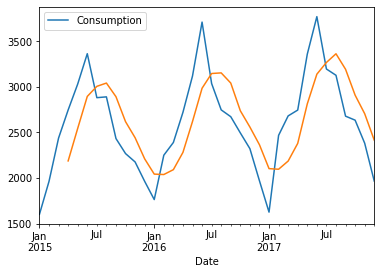

In [24]:
rolling_mean = sales.Consumption.rolling(window=4).mean()
sales.plot()
rolling_mean.plot()

In [25]:
sales_diff=sales.diff(periods=1)
sales_diff2=sales_diff.diff(periods=1)


In [26]:
sales_diff=sales_diff.iloc[1:,]
sales_diff2=sales_diff2.iloc[1:,]

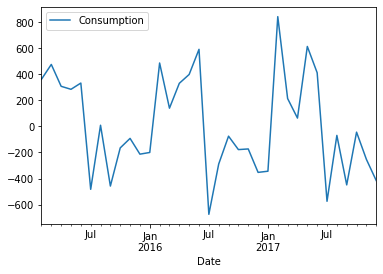

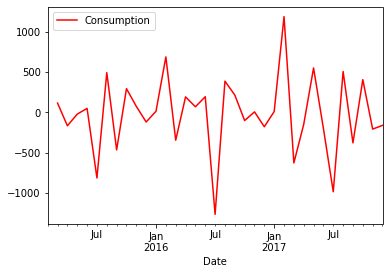

In [27]:
sales_diff.plot()
sales_diff2.plot(color='red')
plt.show()

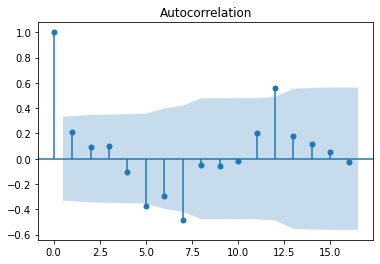

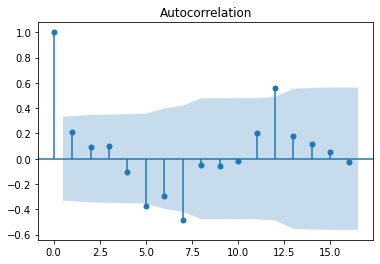

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales_diff)

In [30]:
sales.shape

(36, 1)

In [31]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(5, 2, 1))
model_arima_fit = model_arima.fit()

C:\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [33]:
predictions= model_arima_fit.forecast(steps=10)[0]
print(predictions)

[2837.66837175 3027.09981691 3115.4872137  2853.69494002 2718.46740505
 2587.6420282  2447.67619932 2360.69356352 2379.96358881 2378.87468629]


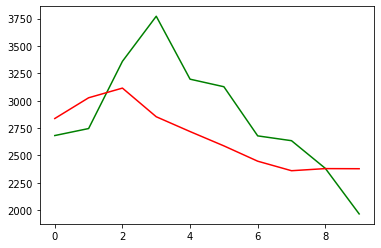

In [34]:
plt.plot(test,color='green')
plt.plot(predictions,color='red')
plt.show()

In [35]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [36]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,(model_arima_fit.aic))
    except:
        continue

(0, 0, 0) 417.0160734582432
(0, 0, 1) 404.100716341684
(0, 0, 2) 400.2451633335976
(0, 0, 3) 400.8179469332926
(0, 0, 4) 403.36711290950973
(0, 1, 0) 385.9092155452298
(0, 1, 1) 386.8208530836947
(0, 1, 2) 388.62520556953336
(0, 1, 3) 390.554144656961
(0, 1, 4) 391.47016809009756
(0, 2, 0) 382.90387201559344
(0, 2, 1) 376.99380339124104
(0, 2, 2) 377.6928550752874
(0, 2, 3) 379.428222296576
(0, 2, 4) 381.2890899099566
(1, 0, 0) 400.1395181787191
(1, 0, 1) 399.6401243455506
(1, 0, 2) 400.828516152639
(1, 0, 3) 402.4206772337264
(1, 0, 4) 401.61833173306246
(1, 1, 0) 386.6824861500895
(1, 1, 1) 388.6393626298385
(1, 1, 2) 388.55701349258237
(1, 1, 3) 389.7993566182508
(1, 2, 0) 379.12462354639024
(1, 2, 1) 377.47504471305035
(1, 2, 2) 379.3598294817059
(1, 2, 3) 377.83129216456314
(2, 0, 0) 397.84945881062146
(2, 1, 0) 388.6134893758797
(2, 1, 1) 387.3436255849763
(2, 2, 0) 380.01522432945364
(2, 2, 1) 379.3200511748398
(3, 0, 0) 396.7213215384622
(3, 0, 1) 389.7193241087617
(3, 1, 0) 39